<a href="https://colab.research.google.com/github/IndraP24/Full-Stack-Deep-Learning-Spring21/blob/main/Deep%20Learning%20Fundamentals/Part%201%20Basics%20%7C%20Coding%20a%20Neural%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Fundamentals - Part 1

```
# This is treated as a code block
```
---

# Colab environment

In [1]:
!python --version

Python 3.7.10


In [2]:
!pip list | grep tensor

tensorboard                   2.4.1         
tensorboard-plugin-wit        1.8.0         
tensorflow                    2.4.1         
tensorflow-datasets           4.0.1         
tensorflow-estimator          2.4.0         
tensorflow-gcs-config         2.4.0         
tensorflow-hub                0.11.0        
tensorflow-metadata           0.28.0        
tensorflow-probability        0.12.1        


In [3]:
!pip list | grep torch

torch                         1.7.1+cu101   
torchsummary                  1.5.1         
torchtext                     0.3.1         
torchvision                   0.8.2+cu101   


In [4]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Basic Numerical Computing

In [5]:
import numpy as np

# Initialize a numpy ndarray 3 rows , 2 cols
X = np.zeros((3, 2))
X

array([[0., 0.],
       [0., 0.],
       [0., 0.]])

In [6]:
# By default, ndarrays are float64
X.shape, X.dtype

((3, 2), dtype('float64'))

In [7]:
# We can set values of a whole row
X[0, :] = 1
X

array([[1., 1.],
       [0., 0.],
       [0., 0.]])

In [8]:
# We can set values of a whole colummn
X[:, 0] = 2
X

array([[2., 1.],
       [2., 0.],
       [2., 0.]])

In [9]:
X = np.array([
              [1, 2],
              [3, 4],
              [5, 6]
])
X

array([[1, 2],
       [3, 4],
       [5, 6]])

In [10]:
x = np.array([10, 20])
print(X.shape, x.shape)

# We can add ndarrays of different dimensions
X + x #Broadcasting

(3, 2) (2,)


array([[11, 22],
       [13, 24],
       [15, 26]])

In [11]:
# Element-wise multiplication

X * x

array([[ 10,  40],
       [ 30,  80],
       [ 50, 120]])

In [12]:
# Matrix multiplication

x = np.array([[10, 20], ]).T
result = X @ x # alternatively, np.dot(X, x)
result

array([[ 50],
       [110],
       [170]])

## Indexing

In [13]:
X = np.random.rand(3, 2)
X

array([[0.54147247, 0.42573069],
       [0.00220206, 0.86192109],
       [0.74814118, 0.98280585]])

In [14]:
X > 0.5

array([[ True, False],
       [False,  True],
       [ True,  True]])

In [15]:
X[X > 0.5] = 1
X

array([[1.        , 0.42573069],
       [0.00220206, 1.        ],
       [1.        , 1.        ]])

# Basic Plotting

In [16]:
import matplotlib.pyplot as plt
import matplotlib
plt.set_cmap('gray')
matplotlib.rcParams['figure.figsize'] = (12, 8)

<Figure size 432x288 with 0 Axes>

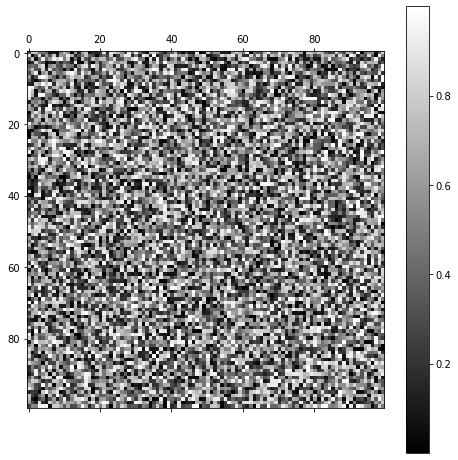

In [17]:
X = np.random.rand(100, 100)
plt.matshow(X)
plt.colorbar()

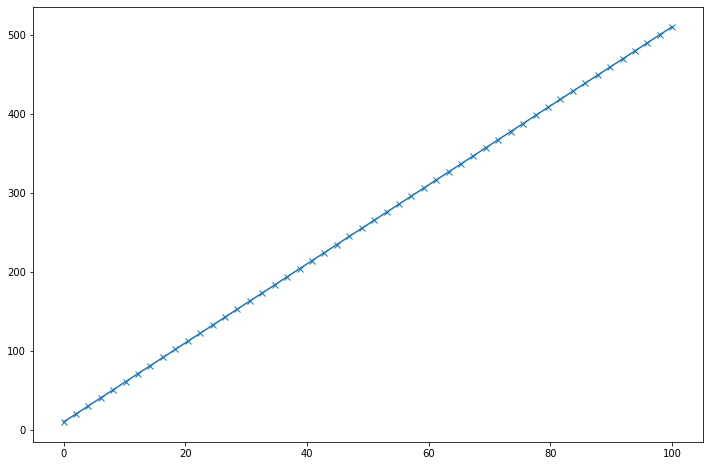

In [18]:
x = np.linspace(0, 100)
y = x * 5 + 10

plt.plot(x, y, 'x-')

# Basic Regression with a linear model

x is 1-dimensional

X: (50, 1), Weights: (1, 1), Bias: (1,), y: (50, 1)


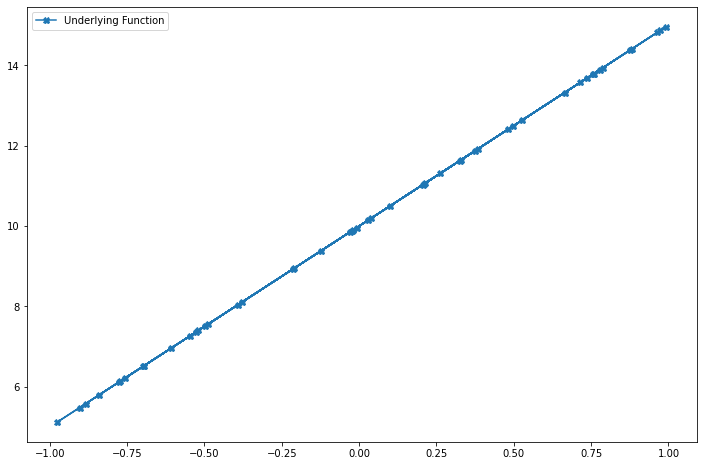

In [19]:
n = 50

d = 1
X = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5], ])
bias_true = np.array([10])

y_true = X @ weights_true + bias_true
print(f'X: {X.shape}, Weights: {weights_true.shape}, Bias: {bias_true.shape}, y: {y_true.shape}')

plt.plot(X, y_true, marker='X', label="Underlying Function")
plt.legend()

## Basic Prediction function: Linear

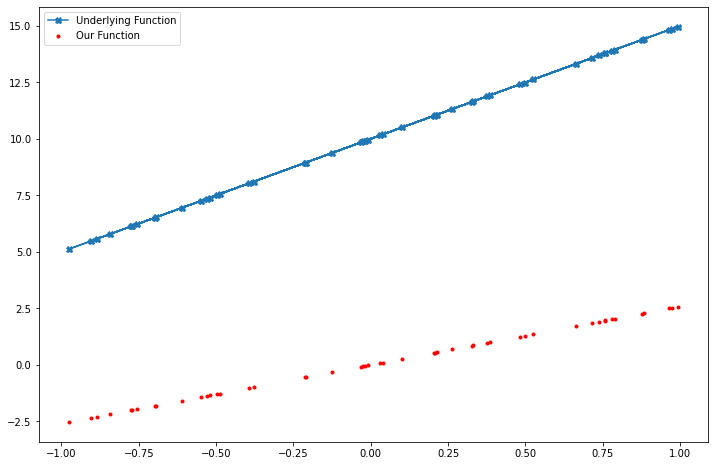

In [20]:
# Initailizing our predictions


class Linear:
    def __init__(self, num_input, num_output=1):
        # The initialization is important to properly deal with different input
        # sizes (otherwise gradients quickly go to 0).
        self.weights = np.random.randn(num_input, num_output) * np.sqrt(2. / num_input)
        self.bias = np.zeros((1))

    def __call__(self, X):
        return X @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(X)
plt.plot(X, y_true, marker="X", label="Underlying Function")
plt.scatter(X, y_pred, color='r', marker='.', label="Our Function")
plt.legend()

## Basic Loss Function: MSE

In [21]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use the Mean Squared Error (MSE), as our loss function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 103.97036319821767


## Back propagation

In [22]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        return self.gradient


class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) - 0.5
        self.bias = np.random.randn(1) - 0.5

    def __call__(self, X):
        self.X = X
        output = X @ self.weights + self.bias
        return output

    # y = w*x + b
    # dy/dx = w
    # dy/dw = X
    # dy/db = 1

    def backward(self, gradient):
        self.weights_gradient = self.X.T @ gradient
        self.bias_gradient = gradient.sum()
        self.X_gradient = gradient @ self.weights.T
        return self.X_gradient

    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [23]:
# Taking one step forward and one step backward to make sure nothing breaks, 
# and that the loss decreases

loss = MSE()
linear = Linear(d)
y_pred = linear(X)
print(loss(y_pred, y_true))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(0.1)
y_pred = linear(X)
print(loss(y_pred, y_true))

107.97971909150827
71.99912915410613


## Train using Gradient Descent